# Example 5 - Inclined Layers cut by Fault

This example will show how to convert the geological map below to a `GemPy` model. This example is based on digitized data. The area is 2978 m wide (W-E extent) and 3728 m high (N-S extent). 

The table below shows the result of a drilling campaign carried out at 5 different points (A-F). For Coal1, the base of the layer is noted. For a sand layer the whole segment is noted. A second coal seam was only encountered at locations B, C and D. The numbers in meter indicate where layer boundaries where encountered below the surface. 

|      | A    | B    | C    | D    | E    | F    |
|------|------|------|------|------|------|------|
|Coal1 |100 m | 50 m | 50 m | 50 m | 150 m| 250 m|
| Sand |100-130 m | 50-100 m | 50-100 m | 50-100 m | 150-220 m| 250-300 m| 
|Coal2 |?     | 100 m| 100 m| 100 m|     ?|     ?|


Coal seam 1 is already outcropping in the area and partial layer boundaries and orientation measurements are provided. Coal seam 2 was not found at locations E and F nor at the surface. The indicated line marks custom section number 1. 


<img src="../../../gemgis/data/examples/example5/task5.png" width="300">

# Importing Libraries

In [1]:
import sys
sys.path.append('../../../gemgis')
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load Data

The data is loaded as for the previous example. However, orientations are not loaded as these will be calculated by available strike lines as shown in the tutorials. 

In [2]:
base_map = rasterio.open('../../../gemgis/data/examples/example5/task5.tif')
interfaces = gpd.read_file('../../../gemgis/data/examples/example5/interfaces5_lines.shp')
# orientations = gpd.read_file('../../../gemgis/data/examples/example5/orientations5.shp')
extent = gpd.read_file('../../../gemgis/data/examples/example5/extent5.shp')
# geological_map = gpd.read_file('../../../gemgis/data/examples/example5/geolmap5.shp')
topo = gpd.read_file('../../../gemgis/data/examples/example5/topo5.shp')
custom_section = gpd.read_file('../../../gemgis/data/examples/example5/customsections5.shp')

# Inspect Data

In [3]:
interfaces.head()

id formation                                           geometry
0  None     Coal1  LINESTRING (792.016 3717.573, 792.016 3717.573...
1  None     Coal1  LINESTRING (1456.629 1043.919, 1456.629 1043.9...

In [4]:
extent.head()

id                                           geometry
0  None  POLYGON ((0.000 0.000, 0.000 3728.000, 2978.00...

In [5]:
topo.head()

id    Z                                           geometry
0  None  200  LINESTRING (151.591 8.547, 227.032 59.217, 273...
1  None  100  LINESTRING (2174.989 10.799, 2161.477 34.445, ...
2  None  150  LINESTRING (1870.409 4.043, 1860.838 33.882, 1...
3  None  250  LINESTRING (1998.772 1855.165, 2031.425 1825.8...
4  None  150  LINESTRING (2977.254 2515.556, 2959.238 2525.1...

# Create GemPy Data Class

In [6]:
geo_data = gg.GemPyData(model_name='Model5', 
                        crs='EPSG:4326')

In [7]:
vars(geo_data)

{'model_name': 'Model5',
 'crs': 'EPSG:4326',
 'extent': None,
 'resolution': None,
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': None,
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'faults': None,
 'is_fault': None}

# Set Extent

In [8]:
geo_data.set_extent(gdf=extent, minz=-200, maxz=500)
geo_data.extent

[0.0, 2978.0, 0.0, 3728.0, -200, 500]

# Set Resolution

In [9]:
geo_data.set_resolution(50,50,50)
geo_data.resolution

[50, 50, 50]

# Plot Data

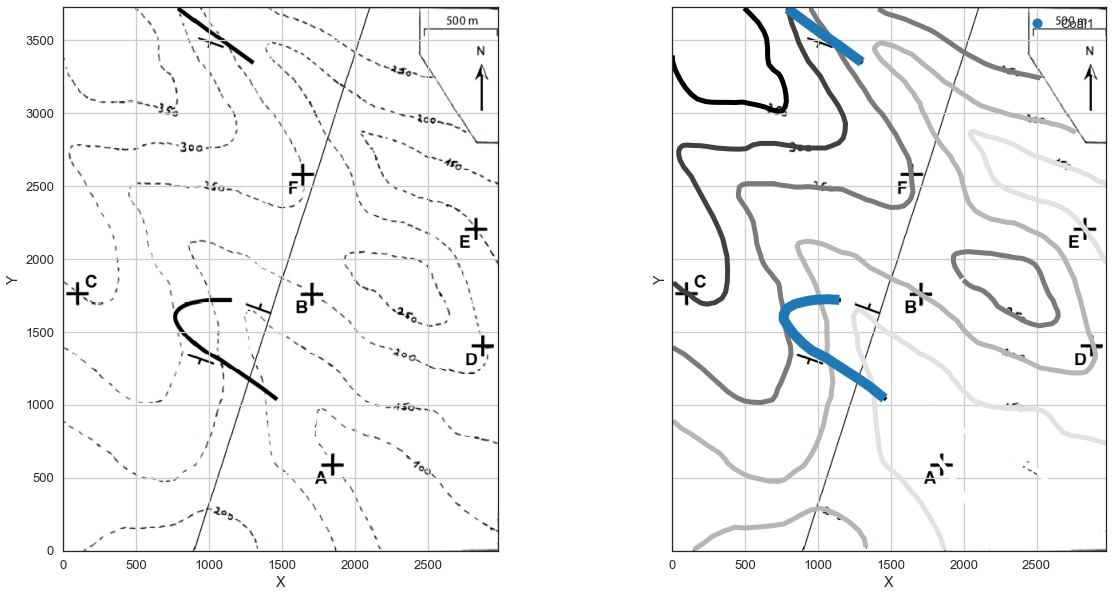

In [10]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray', extent=geo_data.extent[:4])
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray', extent=geo_data.extent[:4])
# Plotting the different elements on the geological map
# geological_map.plot(ax=ax2, column = 'formation', alpha=0.75, legend=True, cmap=ListedColormap(cols))
topo.plot(ax=ax2, column = 'Z', legend = False, linewidth = 5)
interfaces.plot(ax=ax2, column = 'formation', legend = True, linewidth = 10)
# orientations.plot(ax=ax2, column = 'formation', legend = False, s = 300)

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1]);

# Interpolate Topography

In [11]:
topo

id    Z                                           geometry
0  None  200  LINESTRING (151.591 8.547, 227.032 59.217, 273...
1  None  100  LINESTRING (2174.989 10.799, 2161.477 34.445, ...
2  None  150  LINESTRING (1870.409 4.043, 1860.838 33.882, 1...
3  None  250  LINESTRING (1998.772 1855.165, 2031.425 1825.8...
4  None  150  LINESTRING (2977.254 2515.556, 2959.238 2525.1...
5  None  350  LINESTRING (496.143 3720.925, 546.812 3670.255...
6  None  250  LINESTRING (1416.074 3715.295, 1467.869 3684.8...
7  None  300  LINESTRING (793.403 3720.925, 805.789 3672.507...
8  None  250  LINESTRING (5.213 1394.637, 33.362 1376.621, 8...
9  None  200  LINESTRING (2768.384 2869.679, 2719.966 2893.3...

In [12]:
dem = gg.vector.interpolate_raster(topo, method='rbf', n= 100, seed=4)
dem

array([[240.69635946, 240.62197508, 240.54764522, ..., 108.43847005,
        108.48115938, 108.52422594],
       [240.66087212, 240.58646119, 240.51210483, ..., 108.37070788,
        108.41345613, 108.45658439],
       [240.62540871, 240.55097115, 240.47658822, ..., 108.30300049,
        108.34580787, 108.38899807],
       ...,
       [381.70112378, 381.65628254, 381.61144009, ..., 276.1745446 ,
        276.17959256, 276.18467985],
       [381.74102983, 381.69614096, 381.65125077, ..., 276.25882369,
        276.26388205, 276.26897969],
       [381.78091328, 381.73597678, 381.69103884, ..., 276.34307828,
        276.34814709, 276.35325511]])

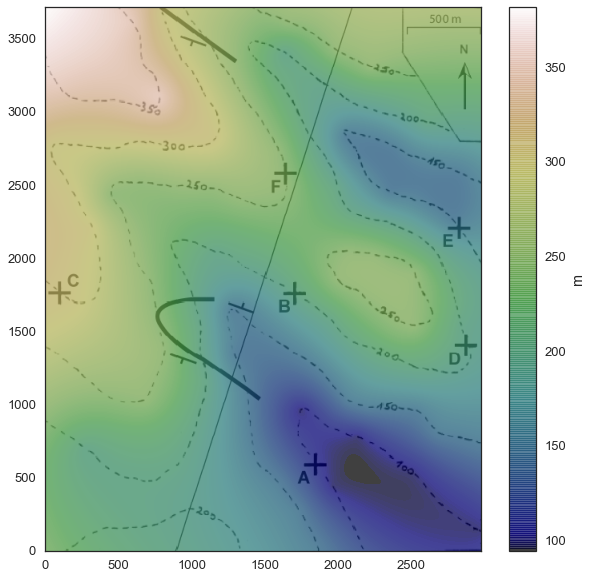

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(np.flipud(base_map.read(1)), origin='lower',
           cmap='gray', extent=geo_data.extent[:4])
im = plt.imshow(dem, origin='lower', alpha=0.75, cmap='gist_earth')
cbar = plt.colorbar(im)
cbar.set_label('m')

# Save Topography as Raster

In [14]:
gg.raster.save_as_tiff('../../../gemgis/data/examples/example5/topo.tif',dem, crs='EPSG:4326', extent=[0, 3000, 0, 3750])

In [15]:
topography = rasterio.open('../../../gemgis/data/examples/example5/topo.tif')
topography

<open DatasetReader name='../../../gemgis/data/examples/example5/topo.tif' mode='r'>

# Set Interfaces

In [16]:
interfaces_coords = gg.vector.extract_coordinates(interfaces,np.flipud(dem), extent=geo_data.extent)
interfaces_coords.head()

id formation                                           geometry  \
0  None     Coal1  LINESTRING (792.016 3717.573, 792.016 3717.573...   
0  None     Coal1  LINESTRING (792.016 3717.573, 792.016 3717.573...   
0  None     Coal1  LINESTRING (792.016 3717.573, 792.016 3717.573...   
0  None     Coal1  LINESTRING (792.016 3717.573, 792.016 3717.573...   
0  None     Coal1  LINESTRING (792.016 3717.573, 792.016 3717.573...   

                                     points            X            Y  \
0    (792.0159136742865, 3717.573390174757)   792.015914  3717.573390   
0    (792.0159136742865, 3717.573390174757)   792.015914  3717.573390   
0   (921.2228614389301, 3622.1460365969483)   921.222861  3622.146037   
0  (1030.1620526914726, 3542.7639902578862)  1030.162053  3542.763990   
0   (1139.945733798686, 3468.4488830468495)  1139.945734  3468.448883   

            Z  
0  305.398624  
0  305.398624  
0  290.566879  
0  281.606181  
0  271.427283

In [17]:
geo_data.to_gempy_df(interfaces_coords, 'interfaces')
geo_data.interfaces

index            X            Y           Z formation
0       0   792.015914  3717.573390  305.398624     Coal1
1       0   792.015914  3717.573390  305.398624     Coal1
2       0   921.222861  3622.146037  290.566879     Coal1
3       0  1030.162053  3542.763990  281.606181     Coal1
4       0  1139.945734  3468.448883  271.427283     Coal1
5       0  1301.243296  3350.220303  252.960597     Coal1
6       0  1301.243296  3350.220303  252.960597     Coal1
7       1  1456.629429  1043.918510  139.798667     Coal1
8       1  1456.629429  1043.918510  139.798667     Coal1
9       1  1359.513096  1123.300557  152.267420     Coal1
10      1  1278.442070  1179.036887  162.926748     Coal1
11      1  1171.191858  1248.285055  180.634405     Coal1
12      1  1171.191858  1248.285055  180.634405     Coal1
13      1  1055.496748  1323.444652  203.136296     Coal1
14      1   959.224905  1372.425064  222.471331     Coal1
15      1   898.421635  1421.405475  233.602981     Coal1
16      1   898.421635  1421.405475  233.602981     Coal1
17      1   835.084896  1485.586704  241.839529     Coal1
18      1   792.015914  1543.012014  245.098210     Coal1
19      1   765.836728  1585.236507  246.768589     Coal1
20      1   765.836728  1620.705081  245.618935     Coal1
21      1   790.326934  1662.929574  241.142818     Coal1
22      1   846.063264  1693.331209  232.122835     Coal1
23      1   933.045719  1713.598965  217.668816     Coal1
24      1   990.471030  1721.199374  207.827375     Coal1
25      1  1066.475116  1724.577333  194.327631     Coal1
26      1  1147.546142  1720.354884  179.601390     Coal1

# Set Orientations

As orientations were not loaded, they have to be calculated based on strike lines provided for the lithological layers and the fault. 

## Load Fault Data and Calculate Orientations

A file containing missing strike values cannot be used to calculate orientations. Therefore, strike lines need to be interpolated with `gg.utils.interpolate_strike_lines(...)`. 

In [18]:
strike = gpd.read_file('../../../gemgis/data/examples/example5/lines5_strike.shp')
gdf = strike.copy(deep=True)
gdf

id    Z formation                                           geometry
0   7    0     Coal1  LINESTRING (1642.839 2582.579, 2829.348 2205.937)
1   6  150     Coal1  LINESTRING (1705.332 1759.201, 2875.795 1406.768)
2   5  200     Coal1  LINESTRING (1017.766 1722.234, 2979.938 1137.003)
3   4  250     Coal1  LINESTRING (99.956 1763.424, 765.837 1620.705,...
4   3  200     Coal1   LINESTRING (1078.147 1313.501, 2963.048 752.760)
5   2  150     Coal1   LINESTRING (1387.230 1097.312, 2968.115 619.330)
6   1    0     Coal1    LINESTRING (1152.462 806.807, 2966.426 249.444)
7   8  250     Coal1  LINESTRING (1103.482 3493.974, 2974.871 2872.429)

In order to interpolate strike lines, the GeoDataFrame containing the incomplete set of strike lines and the height increment between each strike line needs to be provided. Currently, a linear interpolation is performed to obtain the missing strike lines. 

In [19]:
gdf_out = gg.utils.interpolate_strike_lines(gdf, 50)

## Plotting Strike Lines

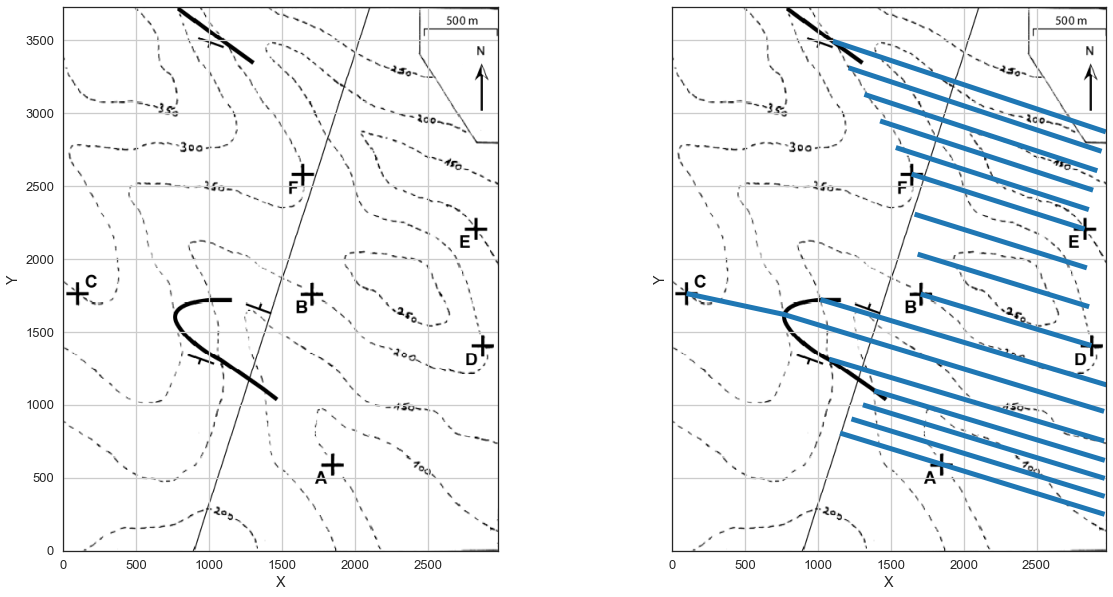

In [20]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray',extent=geo_data.extent[:4])
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray',extent=geo_data.extent[:4])
# Plotting the different elements on the geological map

# topo.plot(ax=ax2, column = 'Z', legend = False, linewidth = 5)
# interfaces.plot(ax=ax2, column = 'formation', legend = True, linewidth = 10)
# orientations.plot(ax=ax2, column = 'formation', legend = False, s = 300)
gdf_out.plot(ax=ax2, column = 'formation', legend = False, linewidth = 5)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1]);

## Calculate Orientations

In [21]:
orientations_coords = gg.utils.calculate_orientations(gdf_out)
orientations_coords

X            Y      Z        dip     azimuth  polarity formation
0   2079.149042   583.158029   25.0  23.176016  197.042917         1     Coal1
1   2118.558568   693.223207   75.0  23.177211  196.961390         1     Coal1
2   2157.968095   803.288385  125.0  23.178561  196.871973         1     Coal1
3   2099.135302   945.725674  175.0  22.202382  196.672533         1     Coal1
4   1574.007424  1281.165400  230.0  14.355699  196.143165         1     Coal1
5   1565.309178  1439.760595  230.0  14.644210   16.245581         1     Coal1
6   2144.707646  1506.301447  175.0  12.237857   16.647011         1     Coal1
7   2281.484895  1718.196743  125.0  11.157723   16.902195         1     Coal1
8   2263.328363  1988.621161   75.0  11.178502   17.188583         1     Coal1
9   2245.171831  2259.045579   25.0  11.199374   17.471513         1     Coal1
10  2216.401861  2473.152163   25.0  19.871564  197.731177         1     Coal1
11  2177.018452  2630.940915   75.0  19.910751  197.923569         1     Coal1
12  2137.635044  2788.729666  125.0  19.943091  198.081402         1     Coal1
13  2098.251635  2946.518417  175.0  19.970229  198.213205         1     Coal1
14  2058.868226  3104.307168  225.0  19.993325  198.324918         1     Coal1

## Plot Orientations

(0.0, 2978.0)

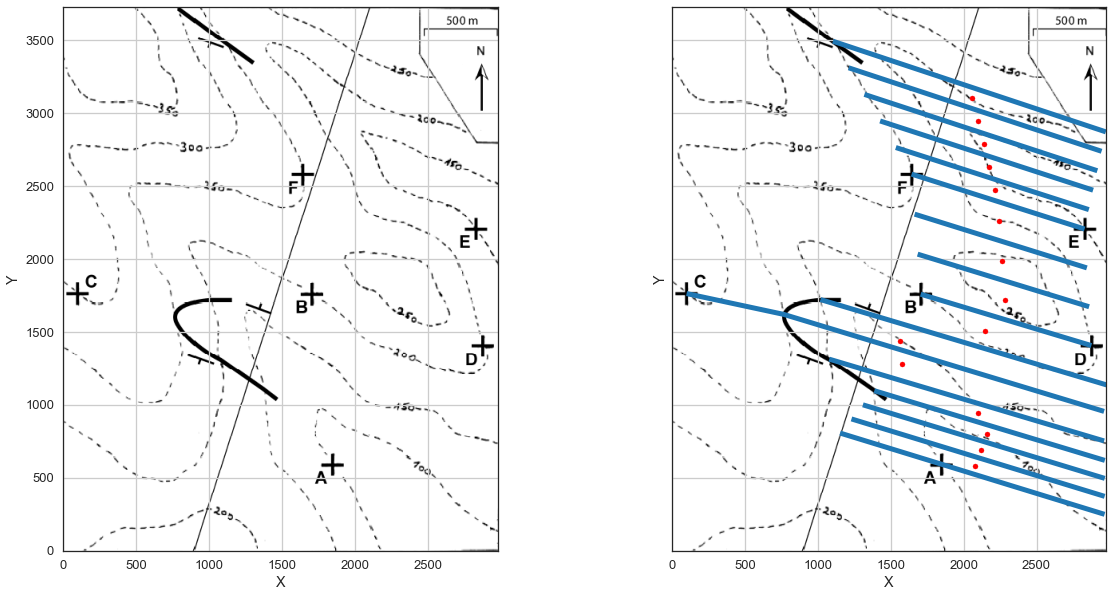

In [22]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(
    ncols=2, sharex=True, sharey=True, figsize=(20, 10))
# Plotting the geological map
ax1.imshow(np.flipud(base_map.read(1)), origin='lower',
           cmap='gray', extent=geo_data.extent[:4])
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(geo_data.extent[2], geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0], geo_data.extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(base_map.read(1)), origin='lower',
           cmap='gray', extent=geo_data.extent[:4])
# Plotting the different elements on the geological map

# topo.plot(ax=ax2, column = 'Z', legend = False, linewidth = 5)
# interfaces.plot(ax=ax2, column = 'formation', legend = True, linewidth = 10)
# orientations.plot(ax=ax2, column = 'formation', legend = False, s = 300)
gdf_out.plot(ax=ax2, column='formation', legend=False, linewidth=5)
ax2.scatter(orientations_coords.X, orientations_coords.Y, s=25, c='r')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(geo_data.extent[2], geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0], geo_data.extent[1])

In [23]:
geo_data.orientations = orientations_coords
geo_data.orientations

X            Y      Z        dip     azimuth  polarity formation
0   2079.149042   583.158029   25.0  23.176016  197.042917         1     Coal1
1   2118.558568   693.223207   75.0  23.177211  196.961390         1     Coal1
2   2157.968095   803.288385  125.0  23.178561  196.871973         1     Coal1
3   2099.135302   945.725674  175.0  22.202382  196.672533         1     Coal1
4   1574.007424  1281.165400  230.0  14.355699  196.143165         1     Coal1
5   1565.309178  1439.760595  230.0  14.644210   16.245581         1     Coal1
6   2144.707646  1506.301447  175.0  12.237857   16.647011         1     Coal1
7   2281.484895  1718.196743  125.0  11.157723   16.902195         1     Coal1
8   2263.328363  1988.621161   75.0  11.178502   17.188583         1     Coal1
9   2245.171831  2259.045579   25.0  11.199374   17.471513         1     Coal1
10  2216.401861  2473.152163   25.0  19.871564  197.731177         1     Coal1
11  2177.018452  2630.940915   75.0  19.910751  197.923569         1     Coal1
12  2137.635044  2788.729666  125.0  19.943091  198.081402         1     Coal1
13  2098.251635  2946.518417  175.0  19.970229  198.213205         1     Coal1
14  2058.868226  3104.307168  225.0  19.993325  198.324918         1     Coal1

# Check Data Class

In [24]:
vars(geo_data)

{'model_name': 'Model5',
 'crs': 'EPSG:4326',
 'extent': [0.0, 2978.0, 0.0, 3728.0, -200, 500],
 'resolution': [50, 50, 50],
 'interfaces':     index            X            Y           Z formation
 0       0   792.015914  3717.573390  305.398624     Coal1
 1       0   792.015914  3717.573390  305.398624     Coal1
 2       0   921.222861  3622.146037  290.566879     Coal1
 3       0  1030.162053  3542.763990  281.606181     Coal1
 4       0  1139.945734  3468.448883  271.427283     Coal1
 5       0  1301.243296  3350.220303  252.960597     Coal1
 6       0  1301.243296  3350.220303  252.960597     Coal1
 7       1  1456.629429  1043.918510  139.798667     Coal1
 8       1  1456.629429  1043.918510  139.798667     Coal1
 9       1  1359.513096  1123.300557  152.267420     Coal1
 10      1  1278.442070  1179.036887  162.926748     Coal1
 11      1  1171.191858  1248.285055  180.634405     Coal1
 12      1  1171.191858  1248.285055  180.634405     Coal1
 13      1  1055.496748  1323.44465

# Add Section Dict

In [25]:
geo_data.to_section_dict(custom_section, 'section')
geo_data.section_dict

{'Section1': ([893.2641683642745, 2.776723868134013],
  [2101.4476537800606, 3725.428751566423],
  [100, 80])}

# Add Surface Colors

# Add Stack

In [26]:
geo_data.stack = {  "Strat_Series": ('Coal1'),
                    "basement": ('basement')}
geo_data.stack

{'Strat_Series': 'Coal1', 'basement': 'basement'}

# Add DEM

In [27]:
geo_data.dem = '../../../gemgis/data/examples/example5/raster5.tif'
geo_data.dem

'../../../gemgis/data/examples/example5/raster5.tif'

# Visualize Data Set

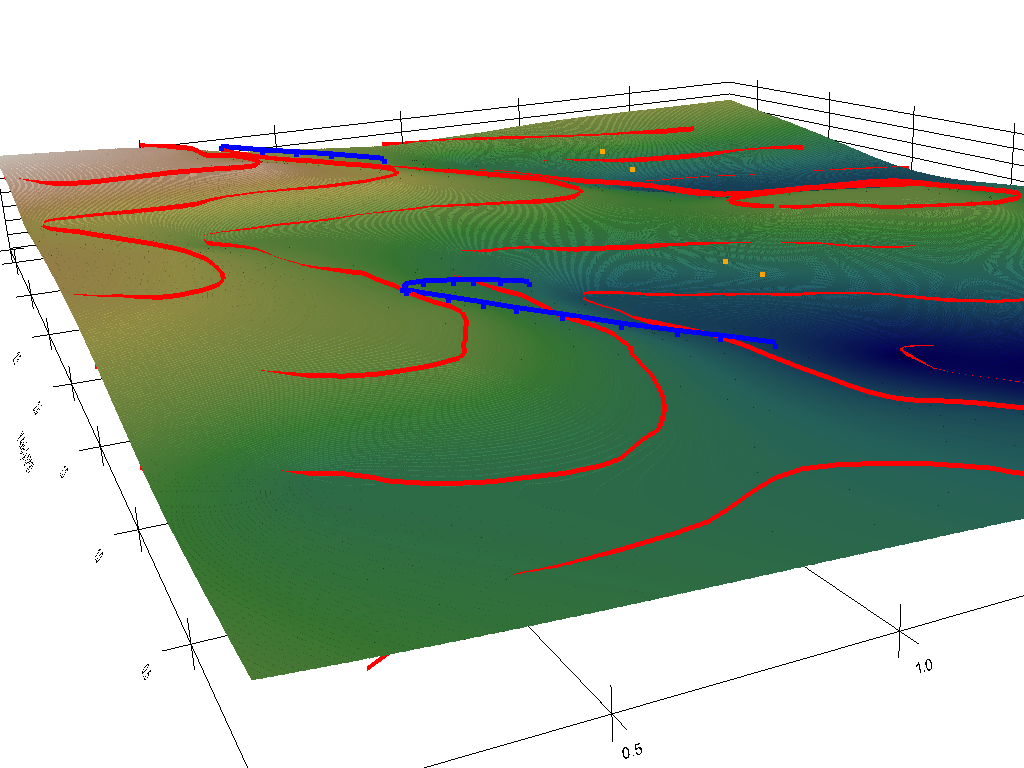

In [28]:
import pyvista as pv
p = pv.Plotter(notebook =True)
gg.visualization.plot_dem_3d(dem, p, cmap = 'gist_earth')
gg.visualization.plot_contours_3d(topo, p, color = 'red', add_to_z = 10)
gg.visualization.plot_points_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)
gg.visualization.plot_points_3d(orientations_coords, p, color = 'orange', add_to_z = 20)
gg.visualization.plot_contours_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)

p.camera_position =[(-283.285811675846, -1597.1397046051004, 1155.542325449192), 
                    (577.9371599370799, 495.3480261506809, 381.7124055285182), 
                    (0.17313457304419916, 0.27814381639313923, 0.9448070898437746)]
p.set_background('white')
p.show_grid(color='black')
p.show()

# Create GemPy Model

## Importing GemPy

Please see https://docs.gempy.org/installation.html for more information on how to install GemPy.

In [29]:
import sys  
sys.path.append('../../../gempy-master')
import gempy as gp
print(gp)
print(gp.__version__)

<module 'gempy' from '../../../gempy-master\\gempy\\__init__.py'>
2.2.2


## Creating GemPy Model

For more information on how to create a GemPy Model, please see the tutorials at: https://docs.gempy.org/tutorials/index.html. With the attributes of the GemPy Data Class, all necessary variables can be passed to the model.

In [30]:
geo_model = gp.create_model(geo_data.model_name)
geo_model

Model5  2020-08-12 17:15

In [31]:
gp.init_data(geo_model, geo_data.extent, geo_data.resolution,
             surface_points_df = geo_data.interfaces,
             orientations_df = geo_data.orientations,
             default_values=True)

Active grids: ['regular']


Model5  2020-08-12 17:15

In [32]:
geo_model.surfaces

surface          series  order_surfaces    color  id
0   Coal1  Default series               1  #015482   1

In [33]:
geo_data.stack

{'Strat_Series': 'Coal1', 'basement': 'basement'}

In [34]:
gp.map_stack_to_surfaces(geo_model,
                         geo_data.stack,
                         remove_unused_series=True)
geo_model.add_surfaces('basement')

surface        series  order_surfaces    color  id
0     Coal1  Strat_Series               1  #015482   1
1  basement  Strat_Series               2  #9f0052   2

In [35]:
geo_model.surfaces.colors.change_colors(geo_data.surface_colors)

Click to select new colors.


../../../gempy-master\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


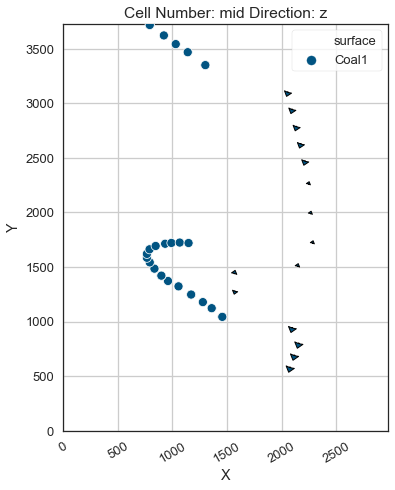

In [36]:
gp.plot_2d(geo_model, direction = 'z')
plt.grid()

A raster created with ArcGIS has to be loaded as the import of the created raster fails. This is due to a bug in `GemPy`described here: https://github.com/cgre-aachen/gempy/issues/492

In [37]:
geo_model.set_topography(
    source='gdal', filepath='../../../gemgis/data/examples/example5/topo_resampled.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  29.78      ,   37.28      , -193.        ],
       [  29.78      ,   37.28      , -179.        ],
       [  29.78      ,   37.28      , -165.        ],
       ...,
       [2973.0033557 , 3703.01340483,  272.52029419],
       [2973.0033557 , 3713.0080429 ,  273.37057495],
       [2973.0033557 , 3723.00268097,  274.21810913]])

In [38]:
geo_model.set_section_grid(geo_data.section_dict)

Active grids: ['regular' 'topography' 'sections']


start                                     stop resolution         dist
Section1  [893.2641683642745, 2.776723868134013]  [2101.4476537800606, 3725.428751566423]  [100, 80]  3913.801918

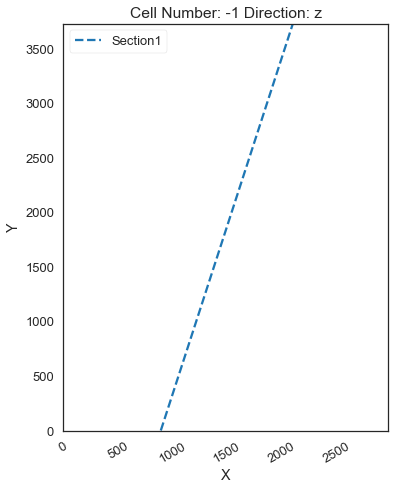

In [39]:
gp.plot.plot_section_traces(geo_model)

In [40]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                  values
range            4822.5
$C_o$            553725
drift equations     [3]


In [41]:
sol = gp.compute_model(geo_model)

The geological map had to be created manually as there seems to be a bug when creating the geological map with `GemGIS`. This was reported already: https://github.com/cgre-aachen/gempy/issues/446

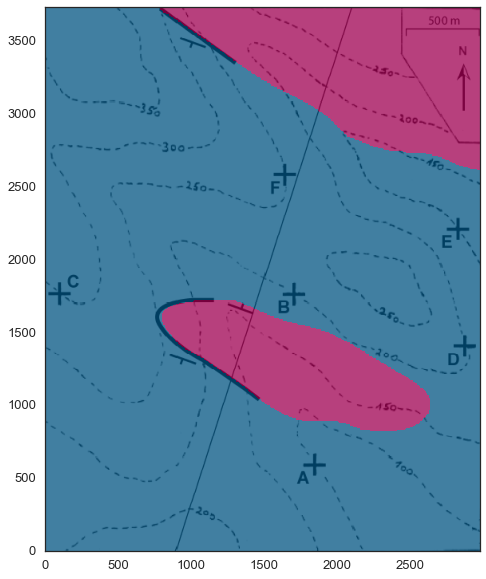

In [42]:
shape = geo_model._grid.topography.values_2d[:, :, 2].shape
geolmap = geo_model.solutions.geological_map[0].reshape(shape)
cols = ['#015482', 	'#9f0052']
plt.figure(figsize=(10, 10))
plt.imshow(np.flipud(base_map.read(1)), origin='lower',
           cmap='gray', extent=geo_data.extent[:4])
gmap = np.rot90(geolmap, 1)
plt.imshow(gmap, extent=geo_data.extent[:4],
           alpha=0.75, cmap=ListedColormap(cols))

../../../gempy-master\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


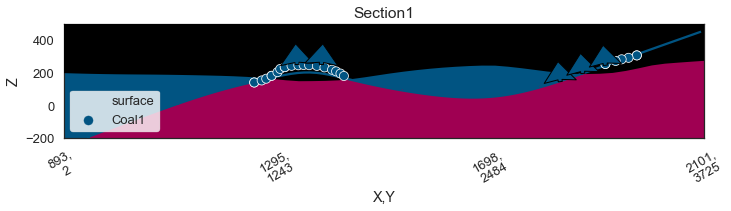

In [43]:
gp.plot_2d(geo_model, section_names=['Section1'], show_topography=True, ve = 1)

../../../gempy-master\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


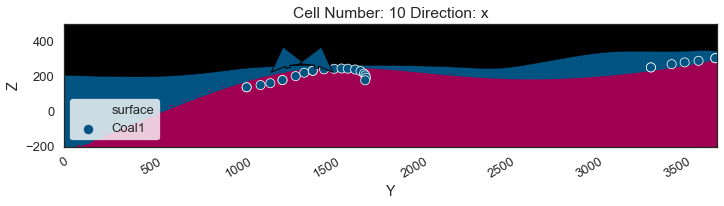

In [44]:
gp.plot_2d(geo_model, direction='x', show_topography=True, cell_number=10, ve=1)

../../../gempy-master\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


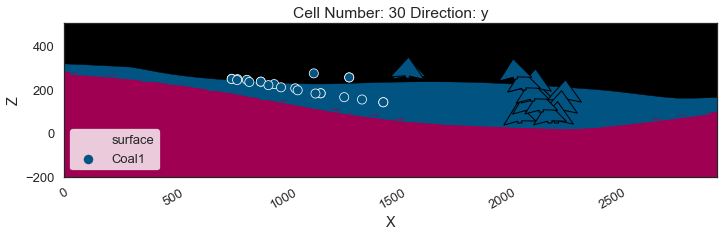

In [45]:
gp.plot_2d(geo_model, direction='y', show_topography=True, cell_number = 30)

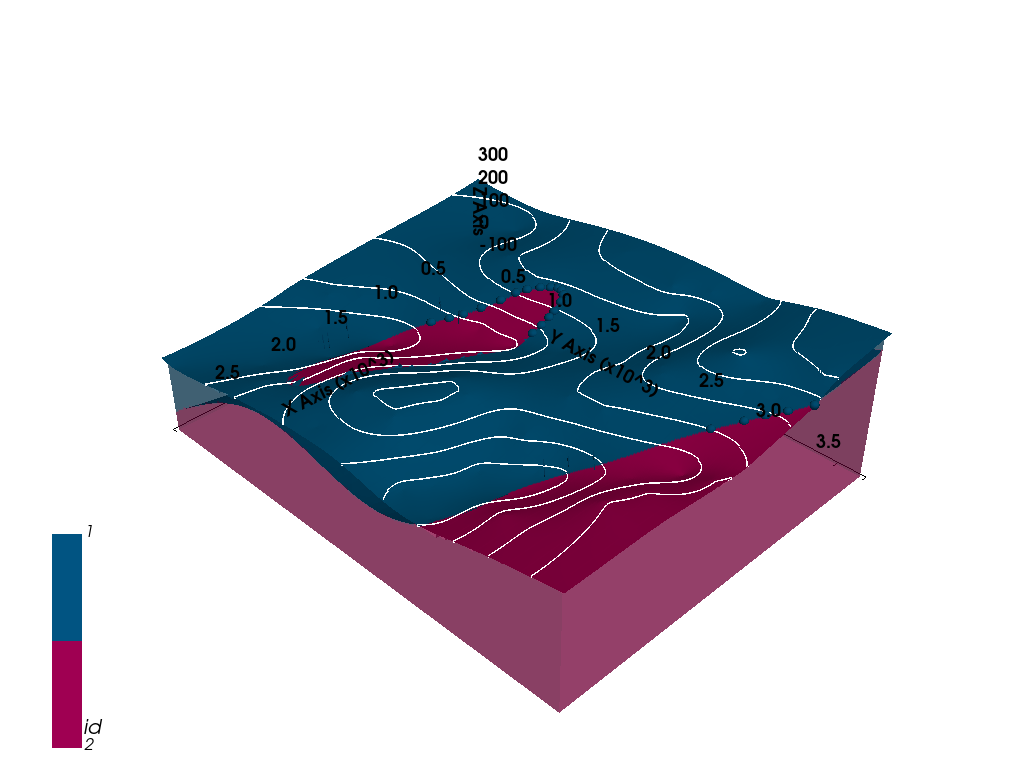

In [46]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True, ve = 2)

# Postprocessing - Converting Geological Map to Shape Files

## Create GeoDataFrame with Polygons

In [47]:
gdf = gg.post.extract_lithologies(geo_model, geo_data.extent[:4], geo_data.crs)
gdf

formation                                           geometry
0  basement  POLYGON ((2233.500 823.984, 2243.493 823.395, ...
1  basement  POLYGON ((2963.010 2613.304, 2973.003 2611.637...
2     Coal1  POLYGON ((14.990 4.997, 4.997 4.997, 4.997 14....

## Plot Polygons

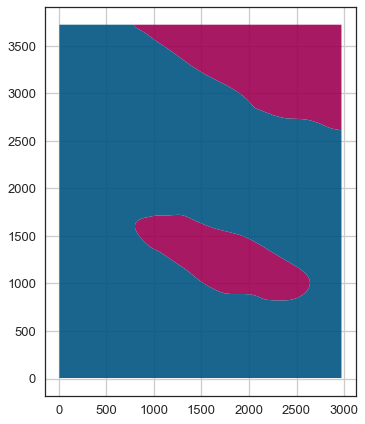

In [48]:
gdf.plot(column='formation', cmap=ListedColormap(cols), alpha=0.9)
plt.grid()

## Save Polygons as Shape Files

These polygons can now be saved as shape files and displayed for example as in QGIS shown below. 

In [49]:
gdf.to_file('../../../gemgis/data/examples/example5/liths.shp')

## Save Polygons as GeoTiff

Rasters like DEMs can be saved as georeferenced tif-files. The same can be done with the geological map obtained from `GemPy` by saving the array of the geological map as tif. 

In [50]:
gg.raster.save_as_tiff('../../../gemgis/data/examples/example5/geolmap.tif',gmap, extent=geo_data.extent, crs='EPSG:4326')

# Create borehole from Geo_Model

Geological models are used to extract information from the subsurface. As geologists, we like to look of the result of the model at a single location and down to the maximum z extent in depth. This is termed a borehole or in the case of fluid extraction a well. These boreholes can easily be extracted and displayed using GemGIS. All you need is the `geo_model` object, the `geo_data` object and the location of your borehole, optionally with its maximum depth. 

Active grids: ['regular']
Click to select new colors.


Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range            700.143
$C_o$            11671.4
drift equations      [3]



Lithology ids 
  [2. 2. 2. ... 1. 1. 1.] 

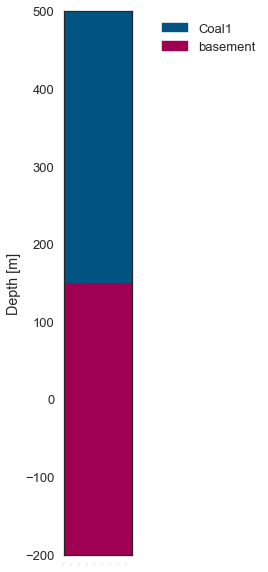

In [51]:
sol = gg.post.extract_borehole(geo_model, geo_data, [2000,2000])
sol

# Depth Maps

Depth maps indicate the depth of a surface within the model extent. By applying an intuitive color coding, the spatial position of the respective surface can easily be interpreted. Depth maps can easily be created by executing `gg.visualization.plot_depth_map(...)`. All that is needed is the `geo_model` object and the name of the surface to be plotted. Optionally, a range for the colorbar can be provided to make the maps of different surfaces comparable. Otherwise, the min and max values of each surface are taken for the limits of the color bar. By setting `notebook` to `False` an interactive PyVista Window is opened (press 'Q' to close window safely again).

## Depth Map Layer1

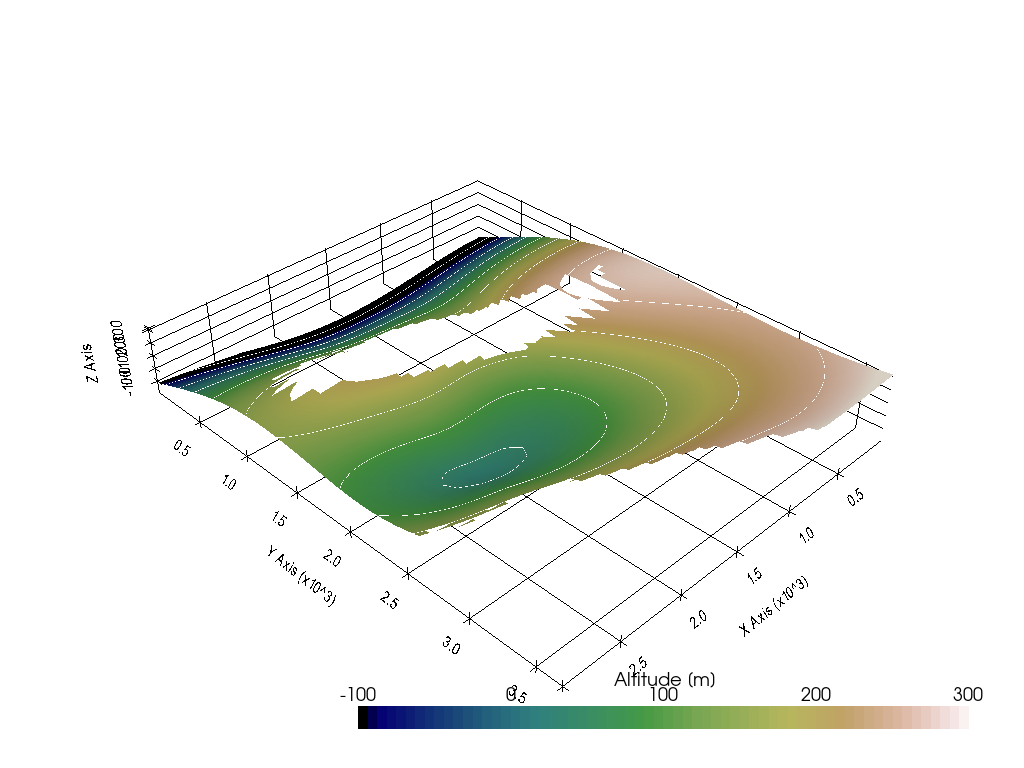

In [52]:
gg.visualization.plot_depth_map(geo_model, 'Coal1', clim=[-100, 300], notebook=True)